In [11]:
# IMPORT Everything here
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
#from Iconfig import api_Key
#from Iconfig import api_READ_token
import json

In [12]:
movie_metadata_path = "Resources/movies_metadata.csv"


movie_metadata = pd.read_csv(movie_metadata_path, low_memory = False)


movie_metadata.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [13]:
movie_metadata_df = movie_metadata[["title", "imdb_id", "genres", "release_date", "budget", "revenue", "runtime", "vote_average", "vote_count", "production_companies"]]

movie_metadata_df.head(20)





,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies
0,Toy Story,tt0114709,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,Jumanji,tt0113497,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,Grumpier Old Men,tt0113228,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,0,0.0,101.0,6.5,92.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,Waiting to Exhale,tt0114885,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,16000000,81452156.0,127.0,6.1,34.0,[{'name': 'Twentieth Century Fox Film Corporat...
4,Father of the Bride Part II,tt0113041,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,0,76578911.0,106.0,5.7,173.0,"[{'name': 'Sandollar Productions', 'id': 5842}..."
5,Heat,tt0113277,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
6,Sabrina,tt0114319,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15,58000000,0.0,127.0,6.2,141.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
7,Tom and Huck,tt0112302,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22,0,0.0,97.0,5.4,45.0,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
8,Sudden Death,tt0114576,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22,35000000,64350171.0,106.0,5.5,174.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."
9,GoldenEye,tt0113189,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16,58000000,352194034.0,130.0,6.6,1194.0,"[{'name': 'United Artists', 'id': 60}, {'name'..."


In [14]:
# We only want movies between 2007 and 2017 that people paid to see
movie_metadata_df = movie_metadata_df.loc[
    (movie_metadata_df["release_date"] >= "2007-01-01")
    & (movie_metadata_df["release_date"] <= "2017-12-31")
    & (movie_metadata_df["revenue"] != 0)
]

movie_metadata_df.head(20)



,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies
4356,Camille Claudel 1915,tt2018086,"[{'id': 18, 'name': 'Drama'}]",2013-03-13,3512454,115860.0,95.0,7.0,20.0,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art..."
11155,Black Gold,tt1701210,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2011-12-21,40000000,5446000.0,130.0,5.9,77.0,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name..."
11472,Freedom Writers,tt0463998,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2007-01-05,21000000,41170784.0,123.0,7.6,368.0,"[{'name': 'Double Feature Films', 'id': 215}, ..."
11497,Code Name: The Cleaner,tt0462229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2007-01-05,20000000,10337477.0,84.0,4.7,78.0,"[{'name': 'New Line Cinema', 'id': 12}]"
11498,Stomp the Yard,tt0775539,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",2007-05-16,13000000,75511123.0,114.0,6.1,90.0,"[{'name': 'Rainforest Films', 'id': 1309}]"
11519,Primeval,tt0772193,"[{'id': 12, 'name': 'Adventure'}]",2007-01-12,0,10597734.0,93.0,4.7,45.0,"[{'name': 'Hollywood Pictures', 'id': 915}, {'..."
11521,The Hitcher,tt0455960,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2007-01-19,10000000,25399945.0,84.0,5.6,253.0,"[{'name': 'Intrepid Pictures', 'id': 1224}, {'..."
11537,Bridge to Terabithia,tt0398808,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",2007-02-16,60000000,137587063.0,96.0,7.0,1146.0,"[{'name': 'Walden Media', 'id': 10221}, {'name..."
11547,Waitress,tt0473308,"[{'id': 35, 'name': 'Comedy'}]",2007-05-25,2000000,22179430.0,108.0,6.6,132.0,"[{'name': 'Night and Day Pictures', 'id': 24133}]"
11557,Epic Movie,tt0799949,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2007-01-25,20000000,86865564.0,86.0,3.2,334.0,[{'name': 'Twentieth Century Fox Film Corporat...


In [19]:
# Convert the "revenue" and "budget" columns to numeric type (float)
movie_metadata_df["revenue"] = pd.to_numeric(movie_metadata_df["revenue"], errors="coerce")
movie_metadata_df["budget"] = pd.to_numeric(movie_metadata_df["budget"], errors="coerce")

# Calculate the net profit by subtracting the budget from the revenue
movie_metadata_df["net_profit"] = movie_metadata_df["revenue"] - movie_metadata_df["budget"]

# Exclude movies with 0 revenue and non-numeric values in "revenue" and "budget" columns
movie_metadata_df = movie_metadata_df.dropna(subset=["revenue", "budget"], how="any")
movie_metadata_df = movie_metadata_df[movie_metadata_df["revenue"] != 0]

# Sort the DataFrame by net profit in descending order
movie_metadata_df = movie_metadata_df.sort_values(by="net_profit", ascending=False)

# Display the first 20 rows of the updated movie_metadata_df DataFrame
print(movie_metadata_df.head(20))



                                              title    imdb_id  \
14551                                        Avatar  tt0499549   
26555                  Star Wars: The Force Awakens  tt2488496   
25084                                Jurassic World  tt0369610   
28830                                     Furious 7  tt2820852   
17818                                  The Avengers  tt0848228   
17437  Harry Potter and the Deathly Hallows: Part 2  tt1201607   
26558                       Avengers: Age of Ultron  tt2395427   
22110                                        Frozen  tt2294629   
42222                          Beauty and the Beast  tt2771200   
30700                                       Minions  tt2293640   
20830                                    Iron Man 3  tt1300854   
43255                       The Fate of the Furious  tt4630562   
44009                               Despicable Me 3  tt3469046   
17293                Transformers: Dark of the Moon  tt1399103   
19261     

In [23]:
pd.options.display.float_format = "{:,}".format

In [24]:
 movie_metadata_df.sort_values(by="net_profit", ascending=False)

,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,net_profit
14551,Avatar,tt0499549,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2009-12-10,237000000,"2,787,965,087.0",162.0,7.2,"12,114.0","[{'name': 'Ingenious Film Partners', 'id': 289...","2,550,965,087.0"
26555,Star Wars: The Force Awakens,tt2488496,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-12-15,245000000,"2,068,223,624.0",136.0,7.5,"7,993.0","[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","1,823,223,624.0"
25084,Jurassic World,tt0369610,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-06-09,150000000,"1,513,528,810.0",124.0,6.5,"8,842.0","[{'name': 'Universal Studios', 'id': 13}, {'na...","1,363,528,810.0"
28830,Furious 7,tt2820852,"[{'id': 28, 'name': 'Action'}]",2015-04-01,190000000,"1,506,249,360.0",137.0,7.3,"4,253.0","[{'name': 'Universal Pictures', 'id': 33}, {'n...","1,316,249,360.0"
17818,The Avengers,tt0848228,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2012-04-25,220000000,"1,519,557,910.0",143.0,7.4,"12,000.0","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","1,299,557,910.0"
...,...,...,...,...,...,...,...,...,...,...,...
13128,Australia,tt0455824,"[{'id': 18, 'name': 'Drama'}]",2008-11-18,130000000,"49,554,002.0",165.0,6.3,712.0,"[{'name': 'Bazmark Films', 'id': 240}, {'name'...","-80,445,998.0"
41491,Live by Night,tt2361317,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",2016-12-25,108000000,"22,678,555.0",129.0,6.2,416.0,"[{'name': 'Appian Way', 'id': 562}, {'name': '...","-85,321,445.0"
44337,Valerian and the City of a Thousand Planets,tt2239822,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",2017-07-20,197471676,"90,024,292.0",137.0,6.7,905.0,"[{'name': 'EuropaCorp', 'id': 6896}]","-107,447,384.0"
16788,Mars Needs Moms,tt1305591,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",2011-03-09,150000000,"38,992,758.0",88.0,5.6,202.0,"[{'name': 'Walt Disney Animation Studios', 'id...","-111,007,242.0"


In [6]:
# Get the top ten net profit movies
top_ten_net_profit_movies = movie_metadata_df.head(10)

# Display the top ten net profit movies
print(top_ten_net_profit_movies)


                                              title    imdb_id  \
14551                                        Avatar  tt0499549   
26555                  Star Wars: The Force Awakens  tt2488496   
25084                                Jurassic World  tt0369610   
28830                                     Furious 7  tt2820852   
17818                                  The Avengers  tt0848228   
17437  Harry Potter and the Deathly Hallows: Part 2  tt1201607   
26558                       Avengers: Age of Ultron  tt2395427   
22110                                        Frozen  tt2294629   
42222                          Beauty and the Beast  tt2771200   
30700                                       Minions  tt2293640   

                                                  genres release_date  \
14551  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2009-12-10   
26555  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2015-12-15   
25084  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam.

In [7]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_metadata_df["release_date"] = pd.to_datetime(movie_metadata_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_metadata_df["release_year"] = movie_metadata_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_metadata_df = movie_metadata_df[(movie_metadata_df["release_year"] >= 2007) & (movie_metadata_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_metadata_df = movie_metadata_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the top ten movies for each year
top_ten_movies_by_year = movie_metadata_df.groupby("release_year").head(10)

# Display the top ten movies of each year and their net profit
for year, group in top_ten_movies_by_year.groupby("release_year"):
    print(f"\nTop 10 Movies of {year}:")
    print(group[["title", "net_profit"]].head(10))



Top 10 Movies of 2007:
                                           title   net_profit
11927  Harry Potter and the Order of the Phoenix  788212738.0
11827   Pirates of the Caribbean: At World's End  661000000.0
11825                            Shrek the Third  638958165.0
11780                               Spider-Man 3  632871626.0
11925                               Transformers  559709780.0
11567                                Ratatouille  473722818.0
11959                         The Simpsons Movie  452068851.0
12217                                I Am Legend  435349010.0
11965                       The Bourne Ultimatum  372824138.0
12278         National Treasure: Book of Secrets  327363168.0

Top 10 Movies of 2008:
                                                   title   net_profit
12481                                    The Dark Knight  819558444.0
12625  Indiana Jones and the Kingdom of the Crystal S...  601636033.0
12768                                         Mamma Mia!  55

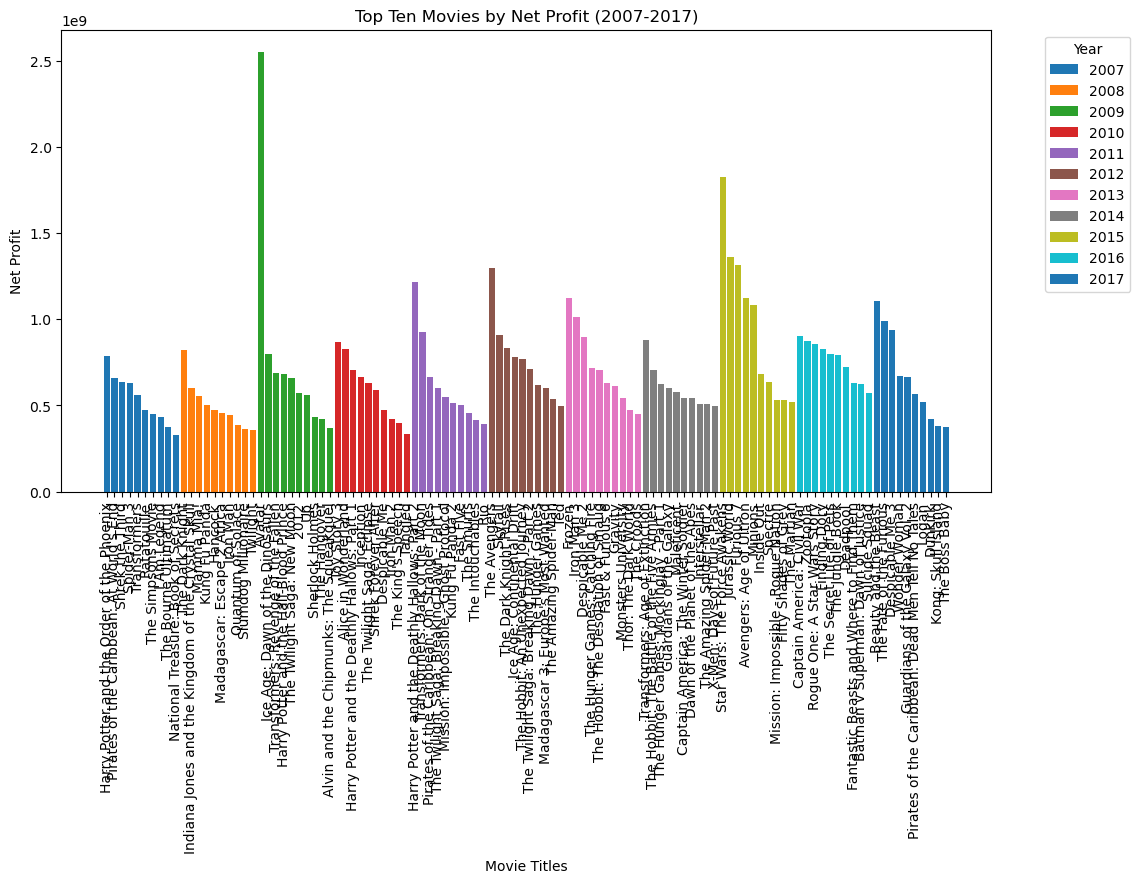

In [8]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_metadata_df["release_date"] = pd.to_datetime(movie_metadata_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_metadata_df["release_year"] = movie_metadata_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_metadata_df = movie_metadata_df[(movie_metadata_df["release_year"] >= 2007) & (movie_metadata_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_metadata_df = movie_metadata_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the top ten movies for each year
top_ten_movies_by_year = movie_metadata_df.groupby("release_year").head(10)

# Create a bar graph for the top ten movies of each year and their net profit
plt.figure(figsize=(12, 6))
for year, group in top_ten_movies_by_year.groupby("release_year"):
    plt.bar(group["title"], group["net_profit"], label=str(year))

plt.xticks(rotation=90)
plt.xlabel("Movie Titles")
plt.ylabel("Net Profit")
plt.title("Top Ten Movies by Net Profit (2007-2017)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')


In [9]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_metadata_df["release_date"] = pd.to_datetime(movie_metadata_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_metadata_df["release_year"] = movie_metadata_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_metadata_df = movie_metadata_df[(movie_metadata_df["release_year"] >= 2007) & (movie_metadata_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_metadata_df = movie_metadata_df.sort_values(by="net_profit", ascending=False)

# Create an empty dictionary to store the top ten movies of each year by genre
top_ten_movies_by_genre = {}

# Group the DataFrame by release_year and extract the top ten movies for each year
grouped_by_year = movie_metadata_df.groupby("release_year")
for year, group in grouped_by_year:
    top_ten_movies_by_genre[year] = group.head(10)["title"].tolist()

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(top_ten_movies_by_genre, orient='index')

# Transpose the DataFrame to have genres as columns and years as rows
df = df.transpose()

# Display the DataFrame with top ten movies organized by genre
print(df)


                                        2007  \
0  Harry Potter and the Order of the Phoenix   
1   Pirates of the Caribbean: At World's End   
2                            Shrek the Third   
3                               Spider-Man 3   
4                               Transformers   
5                                Ratatouille   
6                         The Simpsons Movie   
7                                I Am Legend   
8                       The Bourne Ultimatum   
9         National Treasure: Book of Secrets   

                                                2008  \
0                                    The Dark Knight   
1  Indiana Jones and the Kingdom of the Crystal S...   
2                                         Mamma Mia!   
3                                      Kung Fu Panda   
4                                            Hancock   
5                        Madagascar: Escape 2 Africa   
6                                           Iron Man   
7                      

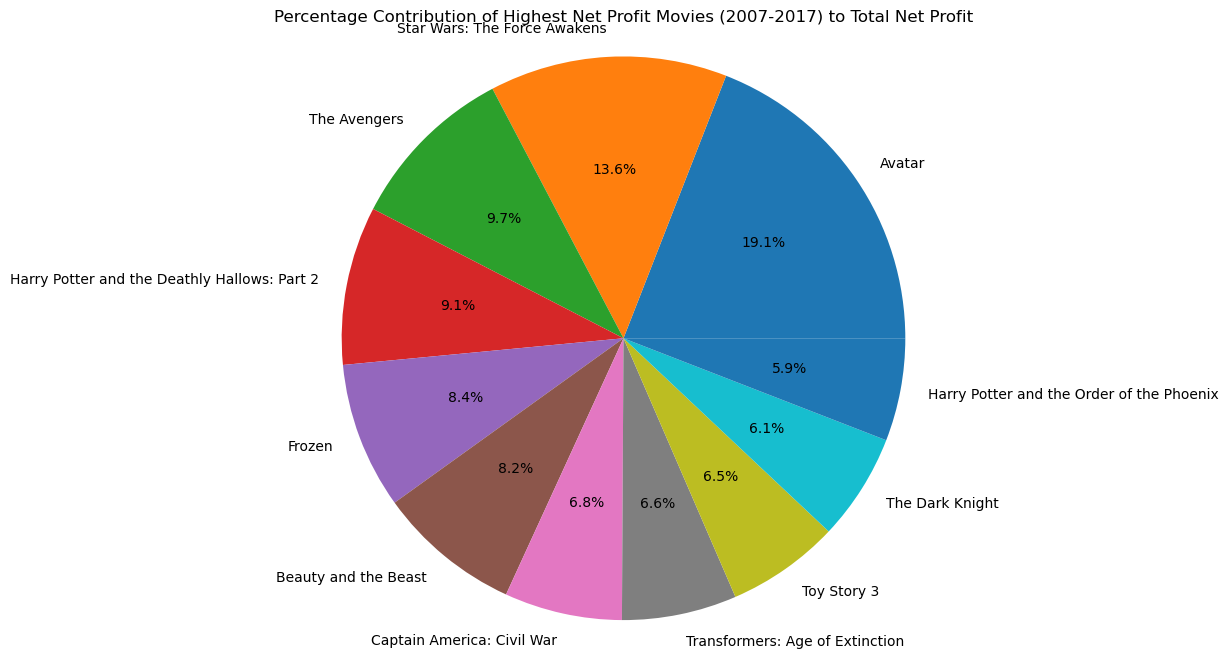

In [10]:
# Convert the "release_date" column to a datetime type for easier manipulation
movie_metadata_df["release_date"] = pd.to_datetime(movie_metadata_df["release_date"])

# Create a new column "release_year" to store the year of release for each movie
movie_metadata_df["release_year"] = movie_metadata_df["release_date"].dt.year

# Filter movies released between 2007 and 2017 (inclusive)
movie_metadata_df = movie_metadata_df[(movie_metadata_df["release_year"] >= 2007) & (movie_metadata_df["release_year"] <= 2017)]

# Sort the DataFrame by net profit in descending order
movie_metadata_df = movie_metadata_df.sort_values(by="net_profit", ascending=False)

# Group the DataFrame by release_year and extract the highest net profit movie for each year
highest_net_profit_movies_by_year = movie_metadata_df.groupby("release_year").head(1)

# Calculate the total net profit for the last ten years
total_net_profit_last_ten_years = highest_net_profit_movies_by_year["net_profit"].sum()

# Calculate the percentage contribution of each highest net profit movie to the total net profit
percentage_contributions = (highest_net_profit_movies_by_year["net_profit"] / total_net_profit_last_ten_years) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_contributions, labels=highest_net_profit_movies_by_year["title"], autopct="%1.1f%%")
plt.title("Percentage Contribution of Highest Net Profit Movies (2007-2017) to Total Net Profit")
plt.axis("equal")
plt.show()


In [ ]:
print(f"The movie database contains {len(movie_metadata_df)} movies that match our criteria.")

In [ ]:

### Just for fun, separated movies by release year ###
    ## Note that the numerals denote year of data ##

moviesVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2007-12-31"), :]
moviesVIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2008-01-01") & (movie_metadata_df["release_date"] <= "2008-12-31"), :]
moviesIX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2009-01-01") & (movie_metadata_df["release_date"] <= "2009-12-31"), :]
moviesX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2010-01-01") & (movie_metadata_df["release_date"] <= "2010-12-31"), :]
moviesXI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2011-01-01") & (movie_metadata_df["release_date"] <= "2011-12-31"), :]
moviesXII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2012-01-01") & (movie_metadata_df["release_date"] <= "2012-12-31"), :]
moviesXIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2013-01-01") & (movie_metadata_df["release_date"] <= "2013-12-31"), :]
moviesXIV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2014-01-01") & (movie_metadata_df["release_date"] <= "2014-12-31"), :]
moviesXV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2015-01-01") & (movie_metadata_df["release_date"] <= "2015-12-31"), :]
moviesXVI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2016-01-01") & (movie_metadata_df["release_date"] <= "2016-12-31"), :]
moviesXVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2017-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :]




In [ ]:
# Here's how many movies this csv catalogues per year, from 2007 to 2017 ##
movieYearList = [len(moviesVII_df["imdb_id"]), len(moviesVIII_df["imdb_id"]), len(moviesIX_df["imdb_id"]), len(moviesX_df["imdb_id"]), len(moviesXI_df["imdb_id"]), len(moviesXII_df["imdb_id"]), len(moviesXIII_df["imdb_id"]), len(moviesXIV_df["imdb_id"]), len(moviesXV_df["imdb_id"]), len(moviesXVI_df["imdb_id"]), len(moviesXVII_df["imdb_id"]) ]
movieYearList
